# Problem Set 3 - 8702

Prof. Javier Bianchi 

Authors: Lucas Belmudes, Hasan Cetin, Jason Hall, Angelo Mendes

In [11]:
# Import packages 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import fsolve

## Exercise 1

In [12]:
#Set parameters 
p=1
R=1.1
β = 0.9/R
z_low = β/(1-β)
z_high = 1.15*z_low
K = 1

### Model without runs

#### Partial Equilibrium 

C:\Users\Angelo\AppData\Local\Temp/ipykernel_6408/3841793732.py:8: RuntimeWarning: invalid value encountered in power
  G = (z_high + p*(1-γ*R))/(z_low+p) - (1-γ)**β
c:\Users\Angelo\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


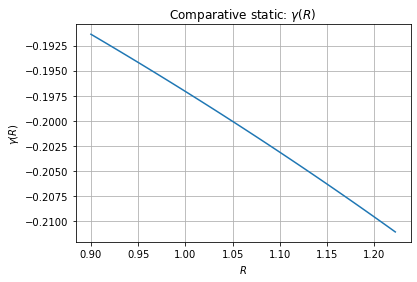

<Figure size 432x288 with 0 Axes>

In [20]:
#Allocate arrays
R_grid = np.linspace(0.9, 1/β, 100)
γ_grid = np.empty_like(R_grid)

# Define equation that solves for gamma
def equation(γ,R=1.1, p=1):

    G = (z_high + p*(1-γ*R))/(z_low+p) - (1-γ)**β

    return G

# Vector of initial guesses 
x0 = np.linspace(-1,1,100)
solutions = np.empty_like(x0)

for (i,r) in enumerate(R_grid):

    # Define function to be optimized for each initial guess (different x0 in case we get different solutions)
    g = lambda γ: equation(γ, R=r)
    
    for (j,x) in enumerate(x0):
        solutions[j] = fsolve(g, x)[0]

    γ_grid[i] = np.min(solutions)

# Plot comparative statics in PE
plt.plot(R_grid, γ_grid)
plt.xlabel('$R$')
plt.ylabel('$\gamma(R)$')
plt.title('Comparative static: $\gamma(R)$')
plt.grid()
plt.show()


The borrowing constraint is decreasing in $R$. The bank's value of defaulting does not depend on $R$ while the repayment value is decreasing in $R$ since banks are borrowers. As a result, the borrowing constraint gets less tight with lower $R$. 

#### General Equilibrium

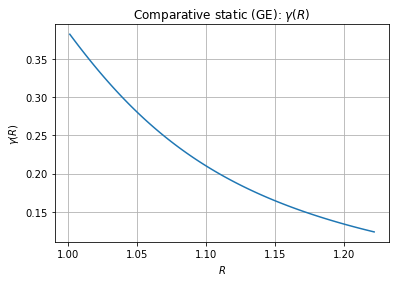

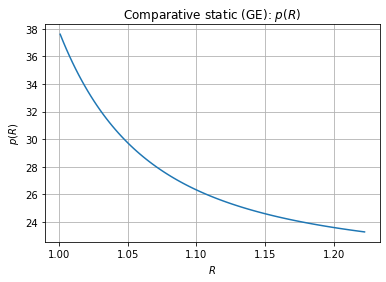

<Figure size 432x288 with 0 Axes>

In [14]:
#Allocate arrays
R_grid_ge = np.linspace(1.001, 1/β, 100)
γ_grid_ge = np.empty_like(R_grid)

# Define equation that solves for gamma in GE
def ge_equation(γ,R=1.1):

    p = β*z_high / (1-β-(1-β*R)*γ)
    H = (z_high + p*(1-γ*R))/(z_low+p) - (1-γ)**β

    return H

# Vector of initial guesses 
x0 = np.linspace(-0.1,0.1,100)
solutions = np.empty_like(x0)

for (i,r) in enumerate(R_grid_ge):

    # Define function to be optimized for each initial guess (different x0 in case we get different solutions)
    h = lambda γ: ge_equation(γ, R=r)
    
    for (j,x) in enumerate(x0):
        solutions[j] = fsolve(h, x)[0]
        if solutions[j]==x:
            solutions[j] = -1000

    γ_grid_ge[i] = np.min(solutions)


# Plot comparative statics for GE case 
plt.plot(R_grid_ge, γ_grid_ge)
plt.xlabel('$R$')
plt.ylabel('$\gamma(R)$')
plt.title('Comparative static (GE): $\gamma(R)$')
plt.grid()
plt.show()

# Allocate price array
p_grid = np.empty_like(R_grid_ge)

for i in np.arange(len(R_grid_ge)):
    R = R_grid_ge[i]
    γ = γ_grid_ge[i]
    p_grid[i] = β*z_high / (1-β-(1-β*R)*γ)

# Plot comparative statics for GE case 
plt.plot(R_grid_ge, p_grid)
plt.xlabel('$R$')
plt.ylabel('$p(R)$')
plt.title('Comparative static (GE): $p(R)$')
plt.grid()
plt.show()
plt.savefig('price.png')

#### Comparing GE and PE

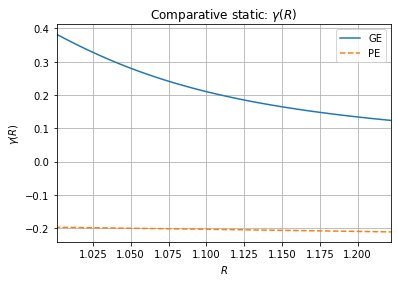

<Figure size 432x288 with 0 Axes>

In [15]:
# Compare PE and GE
plt.plot(R_grid_ge, γ_grid_ge)
plt.plot(R_grid, γ_grid, '--')
plt.legend(['GE', 'PE'])
plt.xlabel('$R$')
plt.xlim((np.min(R_grid_ge), np.max(R_grid_ge)))
plt.ylabel('$\gamma(R)$')
plt.title('Comparative static: $\gamma(R)$')
plt.grid()
plt.show()


It is clear that the borrowing constraints are vary **more** with respect to $R$ in the general equilibrium case. Besides the direct changes of $R$ in $\gamma$, the general equilibrium case also takes into consideration how prices vary with interest rates. Taking both effects into account we get a plot as the one above. 

Also notice that  if $\beta R =1$ the repayment price only reflects the productivity return (in the repayment case). In this case the borrowing constraint does not bind and prices are similar to a world without any commitment friction. 

### Model with runs

#### Partial Equilibrium

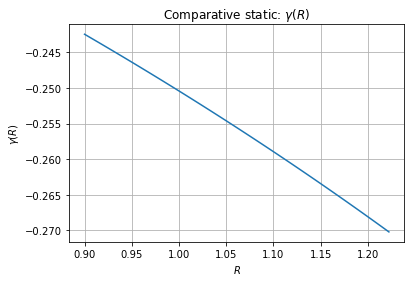

<Figure size 432x288 with 0 Axes>

In [16]:
#Allocate arrays
γ_grid_runs = np.empty_like(R_grid)

# Define equation that solves for gamma
def equation(γ,R=1.1, p=1):

    G = β*np.log((z_high+p*(1-γ*R))/(z_high+p))*(1-β) + β**2*np.log(1-γ) -  np.log((z_high+p*(1-γ*R))/(z_low+p))

    return G

# Vector of initial guesses 
solutions = np.empty_like(x0)

for (i,r) in enumerate(R_grid):

    # Define function to be optimized for each initial guess (different x0 in case we get different solutions)
    g = lambda γ: equation(γ, R=r)
    
    for (j,x) in enumerate(x0):
        solutions[j] = fsolve(g, x)[0]

    γ_grid_runs[i] = np.min(solutions)

# Plot comparative statics in PE
plt.plot(R_grid, γ_grid_runs)
plt.xlabel('$R$')
plt.ylabel('$\gamma(R)$')
plt.title('Comparative static: $\gamma(R)$')
plt.grid()
plt.show()


#### General Equilibrium

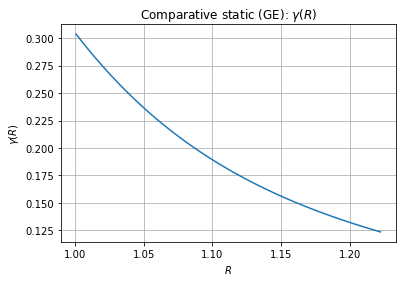

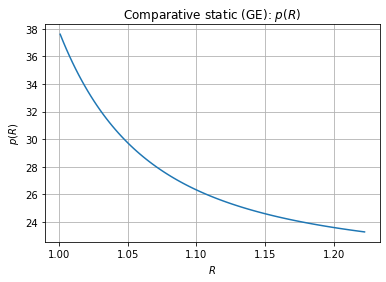

<Figure size 432x288 with 0 Axes>

In [17]:
#Allocate arrays
γ_grid_ge_runs = np.empty_like(R_grid)

# Define equation that solves for gamma in GE
def ge_equation(γ,R=1.1):

    p = β*z_high / (1-β-(1-β*R)*γ)
    H = β*np.log((z_high+p*(1-γ*R))/(z_high+p))*(1-β) + β**2*np.log(1-γ) -  np.log((z_high+p*(1-γ*R))/(z_low+p))


    return H

# Vector of initial guesses 
x0 = np.linspace(-0.1,0.1,100)
solutions = np.empty_like(x0)

for (i,r) in enumerate(R_grid_ge):

    # Define function to be optimized for each initial guess (different x0 in case we get different solutions)
    h = lambda γ: ge_equation(γ, R=r)
    
    for (j,x) in enumerate(x0):
        solutions[j] = fsolve(h, x)[0]
        if solutions[j]==x:
            solutions[j] = -1000

    γ_grid_ge_runs[i] = np.min(solutions)


# Plot comparative statics for GE case 
plt.plot(R_grid_ge, γ_grid_ge_runs)
plt.xlabel('$R$')
plt.ylabel('$\gamma(R)$')
plt.title('Comparative static (GE): $\gamma(R)$')
plt.grid()
plt.show()

# Allocate price array
p_grid = np.empty_like(R_grid_ge)

for i in np.arange(len(R_grid_ge)):
    R = R_grid_ge[i]
    γ = γ_grid_ge[i]
    p_grid[i] = β*z_high / (1-β-(1-β*R)*γ)

# Plot comparative statics for GE case 
plt.plot(R_grid_ge, p_grid)
plt.xlabel('$R$')
plt.ylabel('$p(R)$')
plt.title('Comparative static (GE): $p(R)$')
plt.grid()
plt.show()
plt.savefig('price_runs.png')

#### Comparing GE and PE

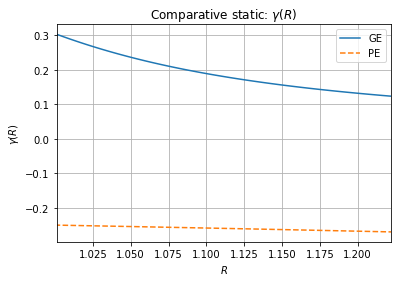

<Figure size 432x288 with 0 Axes>

In [18]:
# Compare PE and GE
plt.plot(R_grid_ge, γ_grid_ge_runs)
plt.plot(R_grid, γ_grid_runs, '--')
plt.legend(['GE', 'PE'])
plt.xlabel('$R$')
plt.xlim((np.min(R_grid_ge), np.max(R_grid_ge)))
plt.ylabel('$\gamma(R)$')
plt.title('Comparative static: $\gamma(R)$')
plt.grid()
plt.show()


### Compare the models with and without runs

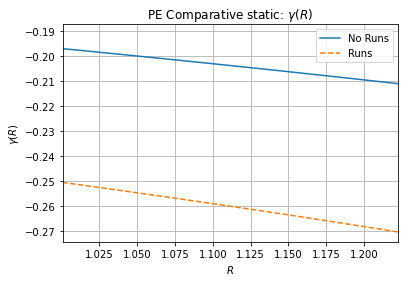

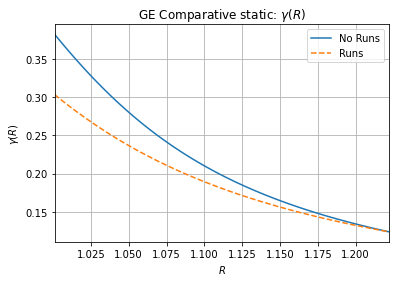

<Figure size 432x288 with 0 Axes>

In [19]:
# Compare runs and no-runs
#PE
plt.plot(R_grid, γ_grid)
plt.plot(R_grid, γ_grid_runs, '--')
plt.legend(['No Runs', 'Runs'])
plt.xlabel('$R$')
plt.xlim((np.min(R_grid_ge), np.max(R_grid_ge)))
plt.ylabel('$\gamma(R)$')
plt.title('PE Comparative static: $\gamma(R)$')
plt.grid()
plt.show()
plt.savefig('comparison_gamma_pe.png')

#GE
plt.plot(R_grid_ge, γ_grid_ge)
plt.plot(R_grid_ge, γ_grid_ge_runs, '--')
plt.legend(['No Runs', 'Runs'])
plt.xlabel('$R$')
plt.xlim((np.min(R_grid_ge), np.max(R_grid_ge)))
plt.ylabel('$\gamma(R)$')
plt.title('GE Comparative static: $\gamma(R)$')
plt.grid()
plt.show()


Note that when $\beta R < 1$ the value of $\gamma^{Runs}<\gamma^{NoRuns}$ since the presence of runs make borrowing limits tighter (the maximum amount of debt required for defaulting is smaller since the bank can suffer from a run). However, in the case $\beta R = 1$ the presence of runs is irrelevant and $\gamma^{Runs} = \gamma^{NoRuns}$. In this case, the borrowing constraint is not binding and $R^k = R = 1/\beta$ and the value of capital represents the present value of the stream of capital endowments of the bank. In the presence of a spot market for capital, banks can always move capital and bonds, and then the constraint will not bind. 

## Exercise 2 

Consider the economy in Amador and Bianchi (2022). The value of repayment at $t=0$ is:

$$\hat{V}_0^R\left(n ; \bar{z}_0\right)=A+\frac{1}{1-\beta} \log \left(\left(\bar{z}_0+p_0\right) K-R b_0\right)+\frac{1}{1-\beta} \sum_{t=1}^{\infty} \beta^t \log \left(R_{t+1}^e\right)$$

Meanwhile, the value of default is:
$$
V_0^D(k)=A+\frac{1}{1-\beta} \log \left(\left(\underline{z}+p_0\right) k\right)+\frac{1}{1-\beta} \sum_{t=1}^{\infty} \beta^t \log \left(R_t^D\right)
$$

***Claim:*** *The value of $\overline{z}_0$ that makes a bank indifferent between defaulting and repaying at $t=0$ is given by:*
$$
\hat{z}^f=\left(\underline{z}+p_0\right) \prod_{t=1}^{\infty}\left(\frac{R_t^D}{R_t^e}\right)^{\beta^t}-p_0\left(1-R \frac{b_0}{k_0}\right)
$$ *

***Proof.*** When banks are indifferent we must have $V_0^D(k) = V_0^R(n;\hat{z}^f)$

$$
    \log \left( \frac{(z+p_0)k-Rb_0}{(\underline{z}+p_0)k} \right) = \sum_{t=1}^\infty \log \left( \frac{R^D_t}{R^e_{t+1}} \right)^{\beta^t}
$$
$$
    \frac{(z+p_0)k-Rb_0}{(\underline{z}+p_0)k} = \prod^\infty_{t=1} \left( \frac{R^D_t}{R^e_{t+1}} \right)^{\beta^t}
$$
$$
    (z+p_0)k-Rb_0 = (\underline{z}+p_0)k\prod^\infty_{t=1} \left( \frac{R^D_t}{R^e_{t+1}} \right)^{\beta^t}
$$
$$
    z+p_0 = (\underline{z}+p_0)\prod^\infty_{t=1} \left( \frac{R^D_t}{R^e_{t+1}} \right)^{\beta^t} + R\frac{b_0}{k}
$$
$$
    \hat{z}^f = (\underline{z}+p_0)\prod^\infty_{t=1} \left( \frac{R^D_t}{R^e_{t+1}} \right)^{\beta^t} - p_0 + R\frac{b_0}{k} 
$$
$$
    \hat{z}^f = (\underline{z}+p_0)\prod^\infty_{t=1} \left( \frac{R^D_t}{R^e_{t+1}} \right)^{\beta^t} - p_0 \left(1+ \frac{R}{p_0}\frac{b_0}{k} \right) \quad \quad \blacksquare
$$